<a href="https://colab.research.google.com/github/blhuillier/2025B_AstroDataAnalysis/blob/main/Notebooks/Chap_7_Bayesian_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monte-Carlo Integration

In [229]:
import pandas as pd
import ssl
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
print (pd.__version__)

# print (plt.rcParams)
mycols = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

2.2.2


## 1. We are interested in calculating
$$I=\int_0^1  {\sqrt{1-u^2}}\mathrm{d}u$$

1. Draw the integrand. What do you expect the answer will be? (do not calculate analytically!)

2. Numerically calculate $I$ with the Monte-Carlo method

3. Conclude

[ True False  True ...  True  True  True]
 Acceptance/ Rejection method:
 Calculated: 0.7889
 Expected pi/4 = 0.7853981633974483


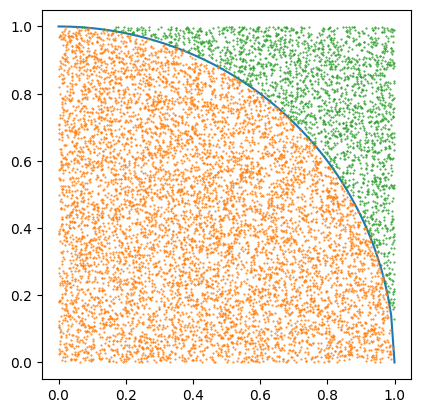

In [230]:
# 1.

uu = np.linspace(0,1,num=101)

def func(xx):
  return np.sqrt(1-xx**2)

fig, ax = plt.subplots(1)
ax.plot(uu, func(uu))
ax.set_aspect(1)

r = np.random.RandomState(42)

NN = 10_000
xx = r.uniform(0,1,NN)
yy = r.uniform(0,1,NN)


ii = yy < func(xx)
print (ii)

ax.plot(xx[ii],yy[ii],ls='',marker='.',markersize=1)
ax.plot(xx[True^ii],yy[True^ii],ls='',marker='.',markersize=1)

# True ^ ii is the XOR operator
# 0 OR 1 = 1
# 0 OR 0 = 0
# 1 OR 1 = 1

# XOR:
# 0 XOR 0 = 0
# 1 XOR 1 = 0
# 0 XOR 1 = 1

# 1-ii
I_AR = ii.sum() / NN
print (" Acceptance/ Rejection method:")
print (f" Calculated: {I_AR}")
print (f" Expected pi/4 = {np.pi/4}")


In [231]:
# MonteCarlo integration:

truth = np.pi/4
I_MC = func(xx).sum()/NN
print (f" Expected pi/4 = {truth:.3f}")
print (f" Acceptance/ Rejection method: {I_AR:.3f}; %err = {100*(I_AR/truth-1):.3f}%")
print (f" MC method: {I_MC:.3f}; %err = {100*(I_MC/truth-1):.3f}%")

 Expected pi/4 = 0.785
 Acceptance/ Rejection method: 0.789; %err = 0.446%
 MC method: 0.790; %err = 0.617%


## 2. Let us consider  $$I=\int_{-1}^{1} \cos 2\pi t \mathrm d t$$





### 2.1 Plot the function & guess the area

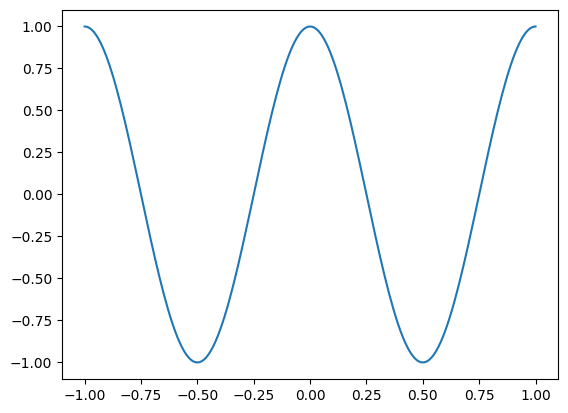

In [232]:
def func2(tt):
  return np.cos(2*np.pi*tt)

fig,ax = plt.subplots(1)
uu = np.linspace(-1,1,num=201)
ax.plot(uu,func2(uu))


### 2.2 Calculate it using the Monte-Carlo Method

In [233]:

xx = r.uniform(-1,1,NN)
I_MC = func2(xx).sum() / NN
print (f"MC: {I_MC}")


MC: -0.005104526094112299


# 3. Model Selection

In Assignment 3, we performed MCMC on the Pantheon dataset.

The [Data]("https://raw.githubusercontent.com/dscolnic/Pantheon/master/lcparam_full_long.txt")
and the systematics part of the covariance matrix are [here](https://raw.githubusercontent.com/dscolnic/Pantheon/master/sys_full_long.txt)

Among the following models, which model fits the Pantheon supernovae compilation better? why?
$\Lambda$CDM, Flat $\Lambda$CDM, $w$CDM, Flat $w$CDM

### 3.1 Which tools do you know can compare these models?

## 3.2 Calculate them and rank the models.

# 4. MCMC with DESI DR2 data


The DESI DR2 BAO data can be found [here](https://raw.githubusercontent.com/blhuillier/Olympiades/refs/heads/main/Data/DESI_DR2.csv).


The data are:

$\begin{align}
\frac{d_M(z)}{r_d}, \frac {d_H}{r_d}, \mathrm{ where}\\
d_H(z) & = \frac {c}{H(z)}, \\
d_M(z) & = \int_0^z \frac {c}{H(z')} \mathrm d z'\\
H^2(z) & = H_0^2 (\Omega_m (1+z)^3 + (1-\Omega_m).
\end{align}$

We will assume that $r_d = 1\, \mathrm{Mpc}$.


1. Use the Astropy.cosmology class to write the likelihood for the Flat-LCDM model.  
2. using the emcee code, run an MCMC

In [234]:
filein = "https://raw.githubusercontent.com/blhuillier/Olympiades/refs/heads/main/Data/DESI_DR2.csv"
DESI = pd.read_csv(filein, sep=',')
DESI.drop(columns=['DV/rd', 'err_DV/rd', 'DM/DH', 'err_DM/DH'],index=0, inplace=True)
DESI.reset_index(drop=True, inplace=True)

from astropy.cosmology import FlatLambdaCDM
from astropy import units as u

DESI

,Tracer,z_eff,"rV,M/H",DM/rd,err_DM/rd,DH/rd,err_DH/rd,"rM,H"
0,LRG1,0.510,0.050,13.588,0.167,21.863,0.425,-0.459
1,LRG2,0.706,-0.018,17.351,0.177,19.455,0.330,-0.404
2,LRG3+ELG1,0.934,0.056,21.576,0.152,17.641,0.193,-0.416
3,ELG2,1.321,0.202,27.601,0.318,14.176,0.221,-0.434
4,QSO,1.484,0.044,30.512,0.760,12.817,0.516,-0.500
5,Lya,2.330,0.574,38.988,0.531,8.632,0.101,-0.431
6,LRG3,0.922,0.106,21.648,0.178,17.577,0.213,-0.406
7,ELG1,0.955,0.420,21.707,0.335,17.803,0.297,-0.462


In [235]:
rd = 143.7 # Mpc

NN = len(DESI)
cov = np.zeros((len(DESI),2,2))
inv_cov = np.zeros((len(DESI),2,2))
for ii in range(NN):
  # define the ii-th covariance matrix
  cov[ii,0,0] = DESI.loc[ii,'err_DM/rd']**2
  cov[ii,1,1] = DESI.loc[ii,'err_DH/rd']**2
  cov [ii, 0,1] = DESI.loc[ii,'err_DH/rd'] * DESI.loc[ii,'err_DM/rd'] * DESI.loc[ii,'rM,H']
  cov [ii, 1,0] = DESI.loc[ii,'err_DH/rd'] * DESI.loc[ii,'err_DM/rd'] * DESI.loc[ii,'rM,H']
  # invert the ii-th covariance matrix
  inv_cov[ii,:,:] = np.linalg.inv(cov[ii,:,:])





# define the prior:

def ln_pi(theta):

  Om0, hh = theta # h = H0/100 km/s/Mpc

  res = -np.inf

  if 0 < Om0 < 1 and 0.5 < hh < 1:
    res = 0
  return res

# define the likelihood:

def ln_L(theta, DESI, inv_cov):

  # (dM, dH):
  Om0, hh = theta

  thiscosmo = FlatLambdaCDM(Om0=Om0, H0=100*hh)
  # make sure everything is in Mpc by using astropy.units:
  dM = thiscosmo.comoving_transverse_distance(DESI['z_eff']).to(u.Mpc).value
  dH = (thiscosmo.hubble_distance.to(u.Mpc)*thiscosmo.inv_efunc(DESI['z_eff'])).value
  model = np.vstack([dM,dH]) / rd
  # print (model.shape)

  residuals = model - DESI[['DM/rd', 'DH/rd']].values.T
  # print (model)
  # print (DESI[['DM/rd', 'DH/rd']].values.T)
  # print (residuals)

  chi2 = (residuals.T @ inv_cov @ residuals).sum()

  return -.5 * chi2

# define the posterior:
def ln_p(theta, DESI, inv_cov):
  lpi = ln_pi(theta)
  if np.isfinite(lpi):
    return lpi + ln_L(theta,DESI,inv_cov)
  return lpi


In [236]:
# test the likelihood function with a reasonable cosmology.
# We expect ln L = - chi2/2 \sim -Ndata \sim -8

Om0 = 0.3
hh = 0.70

theta = (Om0,hh)
print (ln_L(theta,DESI,inv_cov))

-360.6292758139689


In [237]:
# emcee is not present on colab by default, install if not present.
try:
  from emcee import EnsembleSampler
except:
  !pip install emcee
  from emcee import EnsembleSampler

In [238]:
ndim = len(theta) # Dimension of the proble,
nwalkers = 12 # number of independent chains. should be larger than ndims

sampler = EnsembleSampler(
    nwalkers=nwalkers,
    ndim=ndim,
    log_prob_fn=ln_p,
    args=(DESI,inv_cov)
)

# initial position: start from a reasonable point (like best-fit) and slightly
# disturb the position:
p0 = np.array([0.3,0.7])
pos = [p0 * (1 + 1e-4 * np.random.randn(ndim)) for i in range(nwalkers)]

niter = 2000
sampler.run_mcmc(pos, niter, progress=True)

100%|██████████| 2000/2000 [09:19<00:00,  3.58it/s]


State([[0.31257614 0.6975728 ]
 [0.30889    0.69984133]
 [0.3081891  0.69993268]
 [0.31270416 0.69757336]
 [0.3118684  0.69820345]
 [0.31184308 0.69801525]
 [0.31432648 0.69606506]
 [0.31293663 0.69730993]
 [0.31239367 0.69789917]
 [0.31222846 0.69776494]
 [0.31383447 0.69657714]
 [0.31006686 0.69882865]], log_prob=[-0.03835753 -2.48449215 -2.3826609  -0.20760488 -1.14719781 -0.08630625
 -4.69240584 -0.09678584 -1.04080526 -0.01521445 -1.50491762 -0.84286572], blobs=None, random_state=('MT19937', array([ 198669309, 3539996976, 2696186583, 2576100360, 1840503756,
       3579022289, 1599445633, 3973356847, 2175336586, 1499242222,
       3644690337, 3985591873, 1604343765, 1876068729, 1158308326,
       3014629730, 4106381899, 3679884659, 3411428126, 1478108442,
       2224209902, 2105206664, 2432599214, 2334537632, 3211997895,
       1266062230, 4095377812,  848767143, 2360794881, 3793860730,
       2433664535, 3424236829, 3940498162, 3333487621, 3602362778,
       3566125964,  659159997

In [239]:
# get the chains:
chains = sampler.chain
print (chains.shape)
# (nwalkers, niter, ndim)

(12, 2000, 2)


In [240]:
# how many samples are accepted in each chain:
print (sampler.acceptance_fraction)

[0.6965 0.719  0.7085 0.726  0.715  0.73   0.723  0.6865 0.703  0.715
 0.703  0.7065]


In [241]:
# We flatten the chains:
chains = sampler.flatchain
print (chains)

[[0.30004525 0.70004534]
 [0.30000577 0.69991907]
 [0.29998116 0.69997935]
 ...
 [0.31222846 0.69776494]
 [0.31383447 0.69657714]
 [0.31006686 0.69882865]]


In [243]:
# We use ChainConsumer to anlalyse the results:
try:
  from chainconsumer import Chain, ChainConsumer
except:
  !pip install chainconsumer
  from chainconsumer import Chain, ChainConsumer


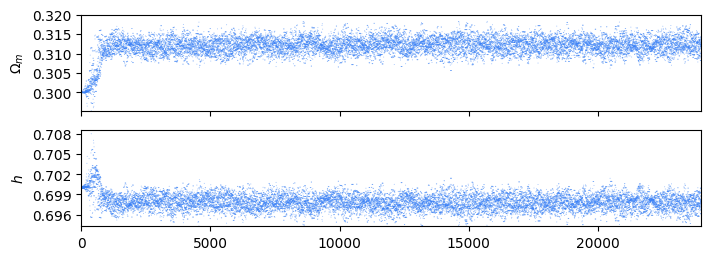

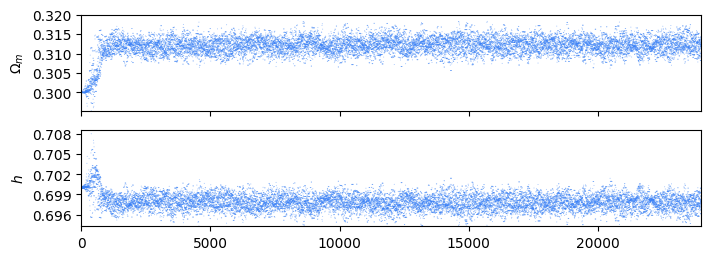

In [245]:
samples = pd.DataFrame(sampler.flatchain,columns=[r'$\Omega_m$', r'$h$'])

chains = Chain(samples=samples,name=r'$\Lambda$CDM')
c = ChainConsumer()
c.add_chain(chains)

c.plotter.plot_walks(plot_weights=False)

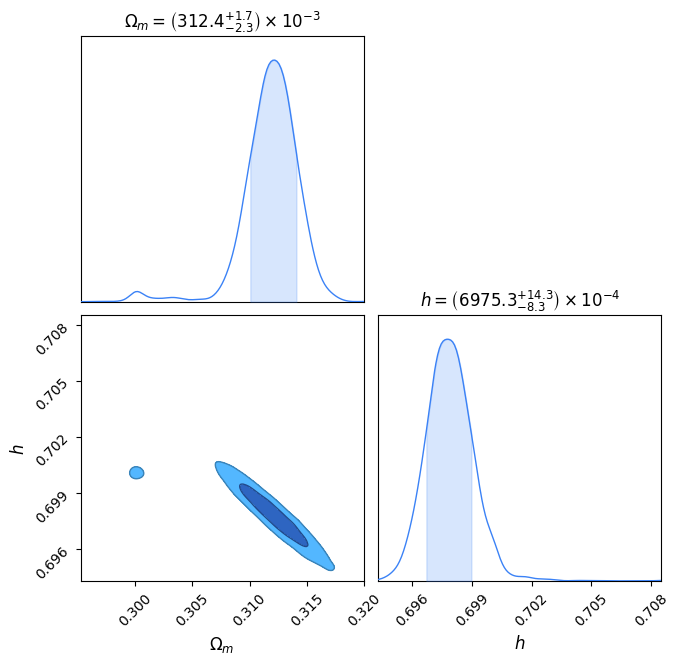

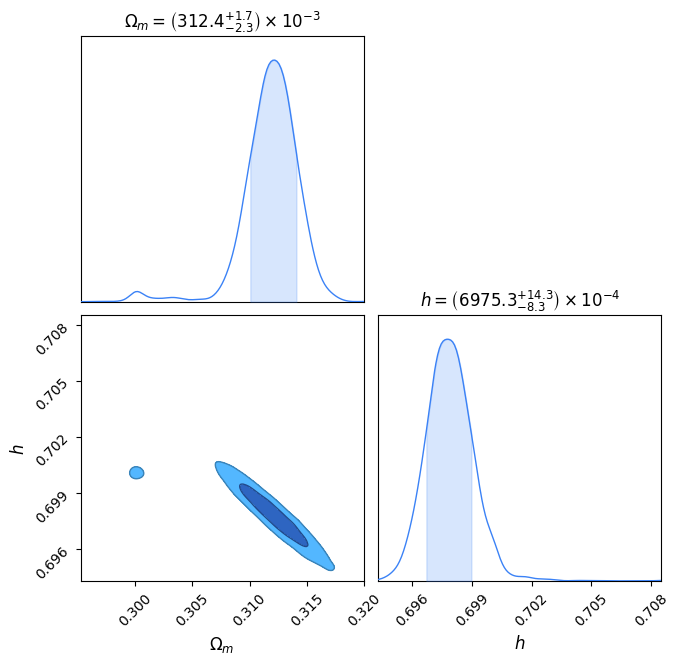

In [247]:

c.plotter.plot()

In [246]:
# it seems we need a burn-in of about 1000 steps.
# we can choose: burnin=100, since we have 12 walkers, each walker will have its first 100 steps discarded.

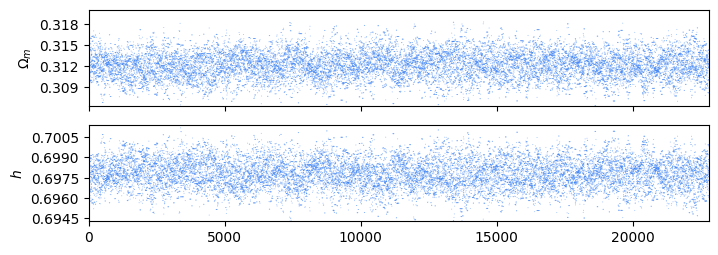

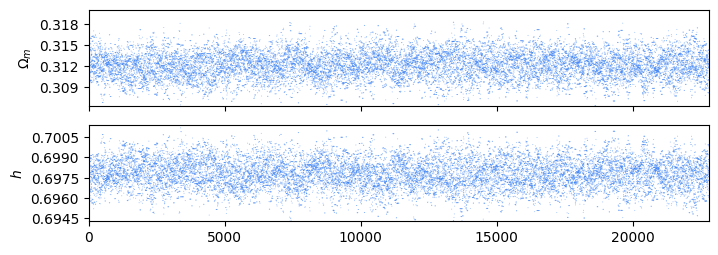

In [250]:
flat_samples = sampler.get_chain(discard=100, flat=True)

samples = pd.DataFrame(flat_samples,columns=[r'$\Omega_m$', r'$h$'])

chains = Chain(samples=samples,name=r'$\Lambda$CDM')
c = ChainConsumer()
c.add_chain(chains)

c.plotter.plot_walks(plot_weights=False)



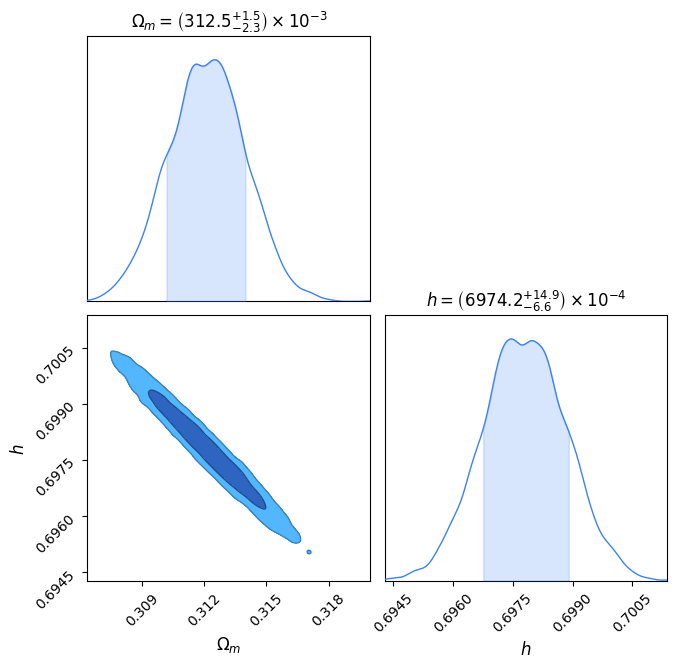

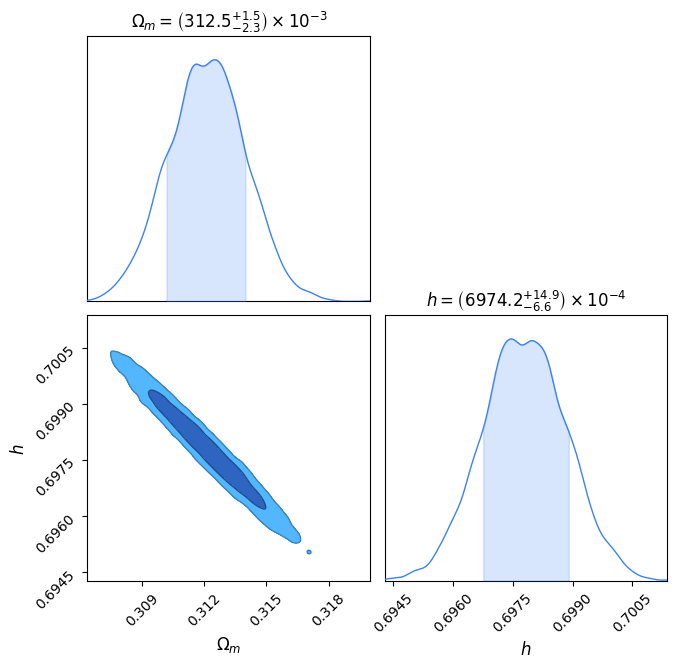

In [249]:

c.plotter.plot()

In [251]:
# R-1 :